# Recognising Handwritten Digits on MNIST Dataset using KNN 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Step 1. Data Preparation

In [2]:
df = pd.read_csv('train.csv')
print(df.shape)

(42000, 785)


In [3]:
print(df)
print(df.columns)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [4]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = df.values
print(data)
print(data.shape)
print(type(data))

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]
(42000, 785)
<class 'numpy.ndarray'>


In [6]:
X = data[:,1:]
Y = data[:,0]

print(X.shape,Y.shape)

(42000, 784) (42000,)


In [7]:
split = int(0.8*X.shape[0])
print(split)

X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


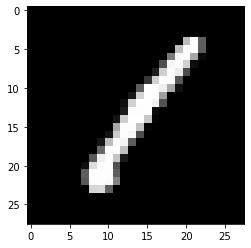

1


In [8]:
#Visualise SOme Samples

def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
    
drawImg(X_train[0])
print(Y_train[0])
    
    

### Step 2. K-NN

In [9]:
# Can we apply KNN to this data ?

In [10]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred
    
    
    

### Step 3 : Make Predictions 

In [11]:
pred1 = knn(X_train,Y_train,X_test[-2])
pred2 = knn(X_train,Y_train,X_test[-1])
pred3 = knn(X_train,Y_train,X_test[-10])
pred4 = knn(X_train,Y_train,X_test[-11])

print(int(pred1))
print(int(pred2))
print(int(pred3))
print(int(pred4))

6
9
3
5


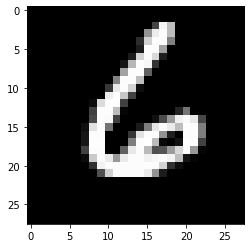

6


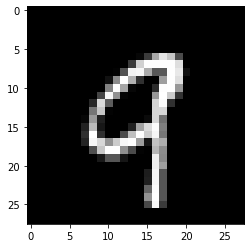

9


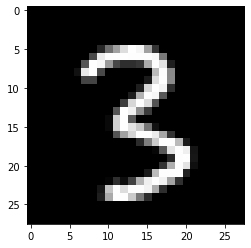

3


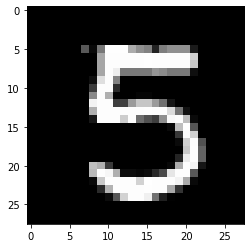

5


In [12]:

drawImg(X_test[-2])
print(Y_test[-2])
drawImg(X_test[-1])
print(Y_test[-1])
drawImg(X_test[-10])
print(Y_test[-10])
drawImg(X_test[-11])
print(Y_test[-11])

In [24]:
true_vals=Y_test[:20]
pred_vals=[]
#n = X_test.shape[0]
for j in range(20):
    pred_vals.append(int(knn(X_train,Y_train,X_test[j])))

In [32]:
pred=np.array(pred_vals)
true=np.array(true_vals)
print(pred)
print(true)
m=pred.shape[0]
print(m)
count=0
for i in range(m):
    if(pred[i]==true[i]):
        count+=1
acc=(count/m)*100
print(acc)

[0 7 7 2 2 6 5 7 5 5 3 0 2 7 6 9 2 3 5 1]
[0 7 7 2 2 6 5 7 8 5 3 0 2 7 6 9 2 3 5 1]
20
95.0
